# Word Clouds Visualizations



In [8]:
# we will print Python version
import sys
print(f"Python version: {sys.version}")

# we will use tqdm for progress bars # install with pip if needed
from tqdm import tqdm

## We will be loading all parquet files from a parquet folder into a single pandas dataframe

## then we will calculate word richness for all novels and plot it using Plotly
# first install Pandas if needed using pip and optional dependencies
# https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html#install-optional-dependencies

# pip install "pandas[performance, plot, output_formatting, computation, excel, html, parquet, compression, consortium-standard]"

# try to import pandas
try:
    import pandas as pd
    print(f"pandas version: {pd.__version__}")
except ImportError:
    print("pandas not found")
# now install Plotly if not already installed
# https://plotly.com/python/getting-started/#installation
# pip install plotly

try:
    import plotly
    print(f"Plotly version: {plotly.__version__}")
except ImportError:
    print("Plotly not found")

# now load wordcloud
    
try:
    import wordcloud
    print(f"Wordcloud version: {wordcloud.__version__}")
except ImportError:
    print("Wordcloud not found")

# now import matplotlib
try:
    import matplotlib
    print(f"matplotlib version: {matplotlib.__version__}")
    import matplotlib.pyplot as plt
except ImportError:
    print("matplotlib not found")

Python version: 3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]
pandas version: 2.1.4
Plotly version: 5.18.0
Wordcloud version: 1.9.3
matplotlib version: 3.8.2


In [4]:
# load dataframe from book_chain_texts.parquet which is in our data folder
# we will use the pandas read_parquet function

df = pd.read_parquet("../data/book_chain_texts.parquet")
# shape
print(df.shape)
# columns
print(df.columns)
# head
df.head()

(17669, 10)
Index(['deprel', 'form', 'index', 'lemma', 'parent', 'pos', 'tag', 'ufeats',
       'upos', 'sent_ndx'],
      dtype='object')


,deprel,form,index,lemma,parent,pos,tag,ufeats,upos,sent_ndx
0,nmod,Staiceles,1,Staicele,2,npfsg_,npfsg5,Case=Gen|Gender=Fem|Number=Sing,PROPN,0
1,root,skolēni,2,skolēns,0,ncmpn_,ncmpn1,Case=Nom|Gender=Masc|Number=Plur,NOUN,0
2,acl,akcijā,3,akcija,2,ncfsl_,ncfsl4,Case=Loc|Gender=Fem|Number=Sing,NOUN,0
3,nmod,Grāmatu,4,grāmata,5,ncfpg_,ncfpg4,Case=Gen|Gender=Fem|Number=Plur,NOUN,0
4,nmod,draugu,5,draugs,6,ncmpg_,ncmpg1,Case=Gen|Gender=Masc|Number=Plur,NOUN,0


In [5]:
# now let's get all  lemma tokens from the dataframe
lemmas = df["lemma"].tolist()
# let's print the first 10 lemmas
print(lemmas[:10])

['Staicele', 'skolēns', 'akcija', 'grāmata', 'draugs', 'ķēde', 'arī', 'Staicele', 'vidusskola', 'audzēknis']


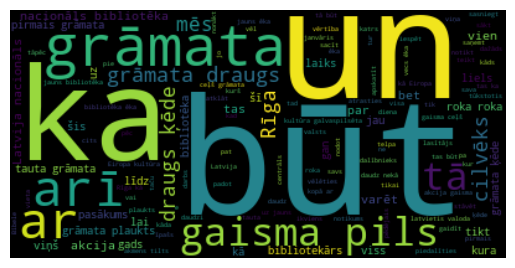

In [7]:
# now let's make a wordcloud from lemmas
# we will use the wordcloud library
# https://amueller.github.io/word_cloud/

# we will use the default settings

wc = wordcloud.WordCloud()
# generate word cloud

wc.generate(" ".join(lemmas))
# show
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# save into img folder
plt.savefig("../img/all_lemmas.png")
plt.show()



In [21]:
# let's make a function that will draw a wordcloud from a list of words
# optionally it will save the wordcloud into a file if filename is given

def draw_wordcloud(words, filename=None, collocations=False):
    wc = wordcloud.WordCloud(collocations=collocations)
    wc.generate(" ".join(words))
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    if filename:
        plt.savefig(filename)
    plt.show()

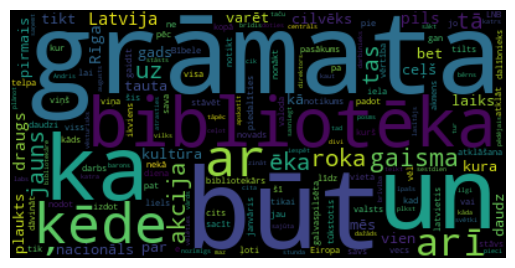

In [26]:
draw_wordcloud(lemmas, "../img/all_lemmas.png")

In [12]:
# now let's get all noun lemmas
nouns = df[df["upos"] == "NOUN"]["lemma"].tolist()
print(f"We have {len(nouns)} nouns")
# let's print the first 10 nouns
print(nouns[:10])

We have 5756 nouns
['skolēns', 'akcija', 'grāmata', 'draugs', 'ķēde', 'vidusskola', 'audzēknis', 'pedagogs', 'grupa', 'janvāris']


In [13]:
# now let's get all verbs
verbs = df[df["upos"] == "VERB"]["lemma"].tolist()
print(f"We have {len(verbs)} verbs")
# let's print the first 10 verbs
print(verbs[:10])

We have 2503 verbs
['piedalīties', 'izbaudīt', 'piedāvāt', 'piedalīties', 'saņemt', 'apskatīt', 'skatīties', 'iesaistīt', 'nostāties', 'pieteikt']


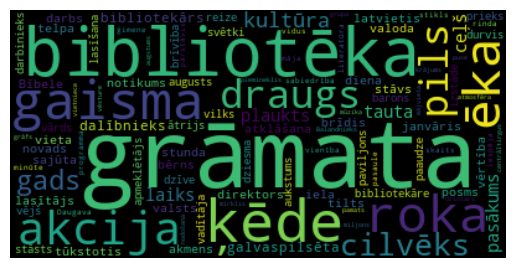

In [23]:
# now let's plot wordclouds for nouns 
draw_wordcloud(nouns, "../img/nouns.png")


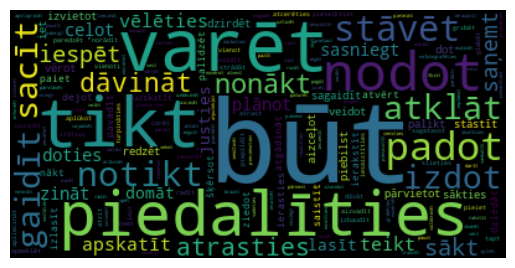

In [25]:
# now let's plot wordclouds for verbs
draw_wordcloud(verbs, "../img/verbs.png")
